In [1]:
# @hidden_cell
# The project token is an authorization token that is used to access project resources like data sources, connections, and used by platform APIs.
from project_lib import Project
project = Project(project_id='432b1dbd-273a-4309-9e12-e54028e3842d', project_access_token='p-98ce83b11fc11526f230d7b162a67edbcae1ef19')
pc = project.project_context


In [2]:
# Insert project token here

# MARATONA BEHIND THE CODE 2020

## DESAFIO 7 - BanCoppel

<hr>

## Instalando Librerias

In [3]:
!pip install scikit-learn --upgrade

Requirement already up-to-date: scikit-learn in /opt/conda/envs/Python36/lib/python3.6/site-packages (0.23.2)


In [4]:
!pip install xgboost --upgrade

Requirement already up-to-date: xgboost in /opt/conda/envs/Python36/lib/python3.6/site-packages (1.2.0)


In [5]:
!pip install imblearn --upgrade

Requirement already up-to-date: imblearn in /opt/conda/envs/Python36/lib/python3.6/site-packages (0.0)


<hr>

## Descargar los conjuntos de datos en formato .csv

In [6]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, Normalizer
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from sklearn.model_selection import KFold, cross_validate, cross_val_score, RandomizedSearchCV
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
import tensorflow as tf
from tensorflow import keras
from sklearn.decomposition import PCA
from sklearn.svm import SVC

In [7]:
!wget --no-check-certificate --content-disposition https://gitlab.com/JoaoPedroPP/datasets/-/raw/master/training_dataset.csv
df_training_dataset = pd.read_csv(r'training_dataset.csv')
df_training_dataset.tail()

--2020-09-18 06:05:18--  https://gitlab.com/JoaoPedroPP/datasets/-/raw/master/training_dataset.csv
Resolving gitlab.com (gitlab.com)... 172.65.251.78, 2606:4700:90:0:f22e:fbec:5bed:a9b9
Connecting to gitlab.com (gitlab.com)|172.65.251.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/plain]
Saving to: ‘training_dataset.csv.4’

    [ <=>                                   ] 2,327,419   --.-K/s   in 0.02s   

2020-09-18 06:05:18 (124 MB/s) - ‘training_dataset.csv.4’ saved [2327419]



,ID,Genero,Años,Estado_civil,Trabajo,Sector,Telefono,Anos_usando_internet_banking,Anos_usando_banca_movil,Banca_movil_userfriendly,Frecuencia_internet_banking_mes,Frecuencia_banca_movil_mes,Frecuencia_pagamentos_tarjeta_mes,Frecuencia_tarjeta_virtual_mes,Frecuencia_saldo_cuenta_mes,TARGET
23994,160,F,40.0,Soltero,Profesor,Sector privado,Iphone 6+,10.0,3.0,Si,31.0,0.0,0.0,0.0,31.0,Perfil_3
23995,155,F,24.0,NaN,Profesor,Institucion publica,L G,15.0,6.0,Si,30.0,30.0,31.0,30.0,7.0,Perfil_0
23996,229,F,24.0,Casado,Profesor,Desempleados,LG V10,5.0,3.0,Si,0.0,30.0,1.0,0.0,0.0,Perfil_4
23997,214,F,24.0,Soltero,Desempleados,Desempleados,Android,5.0,6.0,No,7.0,0.0,1.0,1.0,0.0,Perfil_4
23998,30,M,30.0,Casado,Servidor publico,Institucion publica,0,5.0,4.0,No,31.0,31.0,0.0,0.0,0.0,Perfil_3


Sobre el archivo "training_dataset.csv", temos alguna información sobre los usuarios de la app de BanCoppel:

**ID**

**Genero**

**Idade**

**Estado_civil**

**Trabajo**

**Sector**

**Telefono**

**Anos_usando_internet_banking**

**Anos_usando_banca_movil**

**Banca_movil_userfriendly**

**Frecuencia_internet_banking_mes**

**Frecuencia_banca_movil_mes**

**Frecuencia_pagamentos_tarjeta_mes**

**Frecuencia_tarjeta_virtual_mes**

**Frecuencia_saldo_cuenta_mes**

**TARGET**

In [8]:
df_training_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23999 entries, 0 to 23998
Data columns (total 16 columns):
ID                                   23999 non-null int64
Genero                               23110 non-null object
Años                                 23731 non-null float64
Estado_civil                         23295 non-null object
Trabajo                              21044 non-null object
Sector                               23640 non-null object
Telefono                             22578 non-null object
Anos_usando_internet_banking         23355 non-null float64
Anos_usando_banca_movil              22698 non-null float64
Banca_movil_userfriendly             23999 non-null object
Frecuencia_internet_banking_mes      21275 non-null float64
Frecuencia_banca_movil_mes           22728 non-null float64
Frecuencia_pagamentos_tarjeta_mes    23714 non-null float64
Frecuencia_tarjeta_virtual_mes       23524 non-null float64
Frecuencia_saldo_cuenta_mes          23429 non-null float64

In [9]:
df_training_dataset.nunique()

ID                                   250
Genero                                 3
Años                                   6
Estado_civil                           2
Trabajo                               31
Sector                                 4
Telefono                              73
Anos_usando_internet_banking           5
Anos_usando_banca_movil                6
Banca_movil_userfriendly               2
Frecuencia_internet_banking_mes        7
Frecuencia_banca_movil_mes             7
Frecuencia_pagamentos_tarjeta_mes      7
Frecuencia_tarjeta_virtual_mes         7
Frecuencia_saldo_cuenta_mes            8
TARGET                                 6
dtype: int64

## Historgrama de varibales

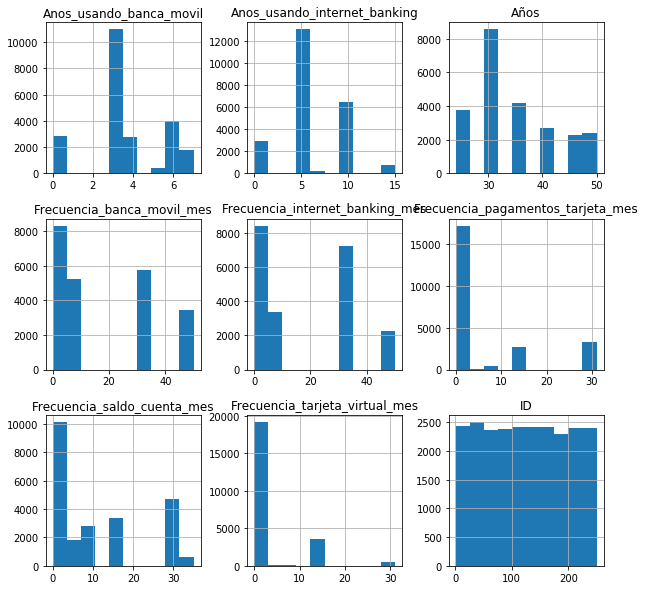

In [10]:
hist = df_training_dataset.hist(figsize=(10,10))

### Parametros del Entorno

In [11]:
semilla_aleatoria = 1234
umbral_categoria = 10
umbral_correlacion = 0.6
pd.options.display.max_columns=21
columna_target = 'TARGET'
categorias_target = []
val = df_training_dataset.groupby([columna_target],as_index=False).size()


In [12]:
def obtener_frecuencia_columnas(df_temp,columna_target):
    columnas_con_frecuencia = [] 
    categorias_target=[]
    for columna in df_temp.columns:    
        df_frecuencia_cat=df_temp.groupby([columna],as_index=False).size()        
        if len(df_frecuencia_cat)<umbral_categoria:
            if columna != columna_target:
                columnas_con_frecuencia.append(columna)
            else:
                for index, val in df_frecuencia_cat.iteritems():        
                    categorias_target.append(index)
            print(df_frecuencia_cat)
    return columnas_con_frecuencia, categorias_target
columnas_categoricas, categorias_target = obtener_frecuencia_columnas(df_training_dataset,columna_target)
print("Columnas con frecuencias: ",columnas_categoricas)
print("Categorias target: ",categorias_target)

Genero
0       92
F    10030
M    12988
dtype: int64
Años
24.0    3728
30.0    8546
35.0    4145
40.0    2669
45.0    2244
50.0    2399
dtype: int64
Estado_civil
Casado     11887
Soltero    11408
dtype: int64
Sector
Desempleados            2210
Institucion publica     9515
Sector privado         11205
Selfemployed             710
dtype: int64
Anos_usando_internet_banking
0.0      2935
5.0     13020
6.0       198
10.0     6471
15.0      731
dtype: int64
Anos_usando_banca_movil
0.0     2822
3.0    10967
4.0     2733
5.0      396
6.0     3995
7.0     1785
dtype: int64
Banca_movil_userfriendly
No     8599
Si    15400
dtype: int64
Frecuencia_internet_banking_mes
0.0     3229
1.0     3768
4.0     1442
7.0     3365
30.0    1523
31.0    5700
50.0    2248
dtype: int64
Frecuencia_banca_movil_mes
0.0     3415
1.0     2831
4.0     2080
7.0     5215
30.0    1904
31.0    3863
50.0    3420
dtype: int64
Frecuencia_pagamentos_tarjeta_mes
0.0      6511
1.0     10690
4.0        91
7.0       410
15.0     

## Hallar todas las correlaciones existentes entre las variables numéricas del conjunto de datos

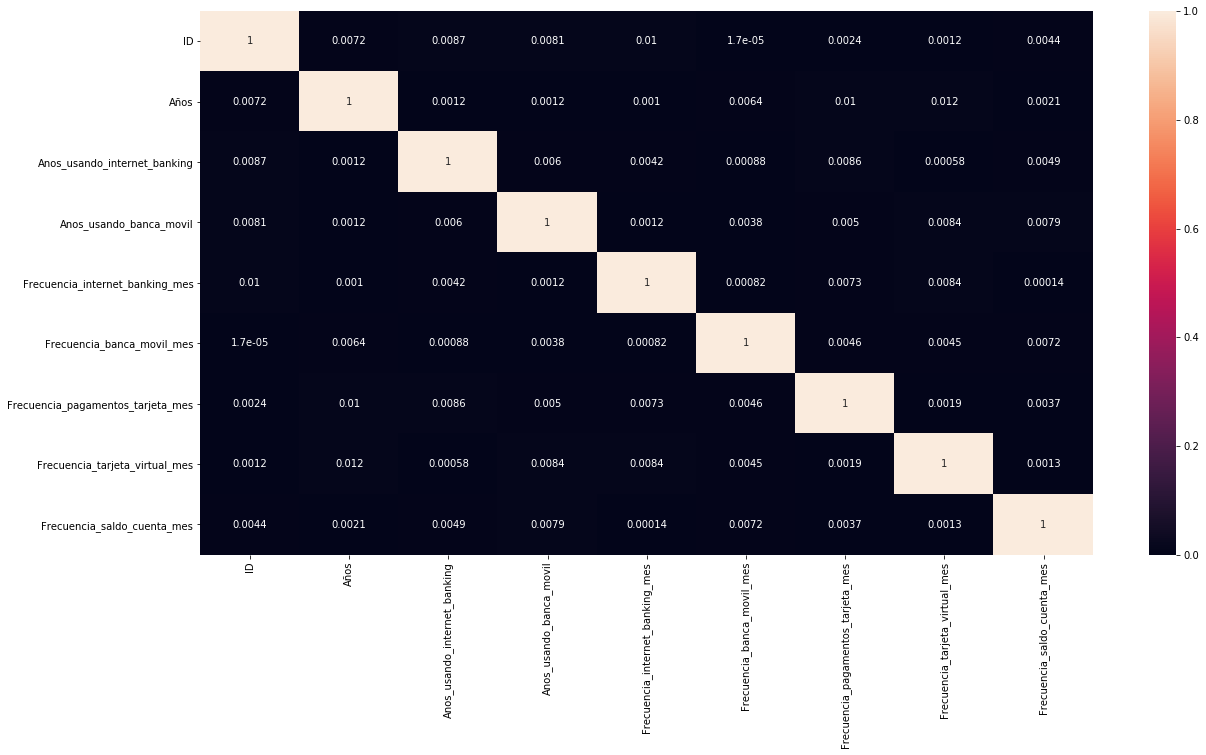

In [13]:
def graficar_correlaciones(df_temp):
    var_num = df_temp._get_numeric_data().columns.values.tolist()
    plt.figure(figsize = (20, 10))
    sns.heatmap(df_temp[var_num].corr().abs(), annot = True)
    
graficar_correlaciones(df_training_dataset)

### Mostrar Correlaciones

In [14]:
def mostrar_correlaciones(df_temp):
    var_num = df_temp._get_numeric_data().columns.values.tolist()
    df_cols = df_temp[var_num].corr().stack().reset_index()
    df_cols.columns = ['VariableA','VariableB','correlation']
    df_corr = df_cols[(df_cols['correlation']>0.6)&(df_cols['correlation']!=1)]
    display(df_corr)
mostrar_correlaciones(df_training_dataset)

,VariableA,VariableB,correlation


<hr>

## Desglose del desafío: clasificación multiclase

Este es un desafio cuyo objetivo de negocio es la segmentación de usuario de aplicativos de BanCopp. Podemos utilizar  dos enfoques: Machine Learning supervisado (clasificación) o no supervisado (clustering). En este desafío será usado la clasificación porque el conjunto de datos ya está disponible con "labels", o en otras palabras, ya con la variable objetivo. 

En la biblioteca scikit-learn tenemos diversos algoritmos para clasificación. El participante es libre para utilizar el framework que desee para completar este desafío.

En este notebook será mostrado un ejemplo usando el algoritmo "Decision Tree" para clasificar los estudantes en seis diferentes perfiles.

# ¡Atención!

La columna objetivo de este desafío es la columna ``TARGET``

<hr>

## Pre-procesando el dataset antes del entrenamiento

### Removiendo todas las lineas que poseen algun valor nulo en determinadas columnas

Usando el método Pandas **DataFrame.dropna()** usted puede remover todas las lineas nulas del dataset.

Docs: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html

In [15]:
# Mostrando los datos nulos del dataset antes de la primera transformación (df)
print("Valores nulos del df_training_dataset antes de la transformación DropNA: \n\n{}\n".format(df_training_dataset.isnull().sum(axis = 0)))

Valores nulos del df_training_dataset antes de la transformación DropNA: 

ID                                      0
Genero                                889
Años                                  268
Estado_civil                          704
Trabajo                              2955
Sector                                359
Telefono                             1421
Anos_usando_internet_banking          644
Anos_usando_banca_movil              1301
Banca_movil_userfriendly                0
Frecuencia_internet_banking_mes      2724
Frecuencia_banca_movil_mes           1271
Frecuencia_pagamentos_tarjeta_mes     285
Frecuencia_tarjeta_virtual_mes        475
Frecuencia_saldo_cuenta_mes           570
TARGET                                  0
dtype: int64



### Revisar

In [16]:
# Aplicando la función para borrar todas las lines con valore NaN en las siguientes columnas:
# df_training_dataset = df_training_dataset.dropna(axis='index', how='any', subset=['Genero', 'Años', 'Estado_civil', 'Trabajo', 'Sector', 'Telefono', 'Anos_usando_internet_banking', 'Anos_usando_banca_movil', 'Frecuencia_internet_banking_mes', 'Frecuencia_banca_movil_mes', 'Frecuencia_pagamentos_tarjeta_mes', 'Frecuencia_tarjeta_virtual_mes', 'Frecuencia_saldo_cuenta_mes', 'TARGET'])

In [17]:
# # Mostrando los datos nulos del dataset despues de la primera transformación (df)
print("Valores nulos del df_training_dataset despues de la transformación DropNA: \n\n{}\n".format(df_training_dataset.isnull().sum(axis = 0)))

Valores nulos del df_training_dataset despues de la transformación DropNA: 

ID                                      0
Genero                                889
Años                                  268
Estado_civil                          704
Trabajo                              2955
Sector                                359
Telefono                             1421
Anos_usando_internet_banking          644
Anos_usando_banca_movil              1301
Banca_movil_userfriendly                0
Frecuencia_internet_banking_mes      2724
Frecuencia_banca_movil_mes           1271
Frecuencia_pagamentos_tarjeta_mes     285
Frecuencia_tarjeta_virtual_mes        475
Frecuencia_saldo_cuenta_mes           570
TARGET                                  0
dtype: int64



### Procesando valores NaN con SimpleImputer de sklearn

Para los valores NaN, usaremos a substituición por la constante 0 como **ejemplo**.

Usted puede escoger la estrategía que crea mejor para tratar los valores nulos :)

Docs: https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html?highlight=simpleimputer#sklearn.impute.SimpleImputer

In [18]:
class DropColumns(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        # Primero copiamos el dataframe de datos de entrada 'X'
        data = X.copy()
        # Devolvemos un nuevo dataframe de datos sin las columnas no deseadas
        return data.drop(labels=self.columns, axis='columns')
    
class DataFrameImputer(TransformerMixin):
    def fit(self, X, y=None):
        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].mean() for c in X],index=X.columns)
        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)
    
class DataScaleImputer(TransformerMixin):
    def __init__(self, columns):
        self.columns = columns
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        df_temp = X.copy()
        features = df_temp.columns.drop(self.columns)
        transformer = ColumnTransformer(transformers=[('scaler',StandardScaler(),features.values)])
        X_transform = transformer.fit_transform(df_temp[features.values])
        X_imputed_df = pd.DataFrame(data = X_transform, index = X.index, columns = features.values)        
        return pd.concat([df_temp[self.columns],X_imputed_df],axis=1)
    
class DataLabelEncoderTransform(TransformerMixin):
    def __init__(self, columns):
        self.columns = columns
        
    def fit(self, X):
        return self
    
    def transform(self, X):    
        df_temp = X.copy()
        features = df_temp.columns.drop(self.columns)
        encoder = LabelEncoder()        
        df_encoder= df_temp[self.columns].apply(encoder.fit_transform)             
        return pd.concat([df_temp[features],df_encoder],axis=1)
    
class DataOneHotEncoderTransform(TransformerMixin):
    def __init__(self, columns):
        self.columns = columns
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):                
        return pd.get_dummies(X, columns=self.columns)   

In [19]:
def validar_nulos(df_temp):
    print(df_temp.shape)
    print("Valores nulos del df_training_dataset despues de la transformación DropNA: \n\n{}\n".format(df_temp.isnull().sum(axis = 0)))

In [20]:
columnas_numericas = df_training_dataset._get_numeric_data().columns.values.tolist()
columnas = df_training_dataset.columns.values.tolist()
columnas_no_numericas = [v for v in columnas if v not in columnas_numericas]
print(columnas_numericas)
print(columnas_no_numericas)

['ID', 'Años', 'Anos_usando_internet_banking', 'Anos_usando_banca_movil', 'Frecuencia_internet_banking_mes', 'Frecuencia_banca_movil_mes', 'Frecuencia_pagamentos_tarjeta_mes', 'Frecuencia_tarjeta_virtual_mes', 'Frecuencia_saldo_cuenta_mes']
['Genero', 'Estado_civil', 'Trabajo', 'Sector', 'Telefono', 'Banca_movil_userfriendly', 'TARGET']


In [21]:
df2 = DataFrameImputer().fit_transform(df_training_dataset)
validar_nulos(df2)

(23999, 16)
Valores nulos del df_training_dataset despues de la transformación DropNA: 

ID                                   0
Genero                               0
Años                                 0
Estado_civil                         0
Trabajo                              0
Sector                               0
Telefono                             0
Anos_usando_internet_banking         0
Anos_usando_banca_movil              0
Banca_movil_userfriendly             0
Frecuencia_internet_banking_mes      0
Frecuencia_banca_movil_mes           0
Frecuencia_pagamentos_tarjeta_mes    0
Frecuencia_tarjeta_virtual_mes       0
Frecuencia_saldo_cuenta_mes          0
TARGET                               0
dtype: int64



In [22]:
df3 = DataScaleImputer(columns=columnas_no_numericas).fit_transform(df2)
validar_nulos(df3)

(23999, 16)
Valores nulos del df_training_dataset despues de la transformación DropNA: 

Genero                               0
Estado_civil                         0
Trabajo                              0
Sector                               0
Telefono                             0
Banca_movil_userfriendly             0
TARGET                               0
ID                                   0
Años                                 0
Anos_usando_internet_banking         0
Anos_usando_banca_movil              0
Frecuencia_internet_banking_mes      0
Frecuencia_banca_movil_mes           0
Frecuencia_pagamentos_tarjeta_mes    0
Frecuencia_tarjeta_virtual_mes       0
Frecuencia_saldo_cuenta_mes          0
dtype: int64



In [23]:
columnas_encoder =  [v for v in columnas_no_numericas if v not in [columna_target] ]
df4 = DataLabelEncoderTransform(columns=columnas_encoder).fit_transform(df3)
validar_nulos(df4)

(23999, 16)
Valores nulos del df_training_dataset despues de la transformación DropNA: 

TARGET                               0
ID                                   0
Años                                 0
Anos_usando_internet_banking         0
Anos_usando_banca_movil              0
Frecuencia_internet_banking_mes      0
Frecuencia_banca_movil_mes           0
Frecuencia_pagamentos_tarjeta_mes    0
Frecuencia_tarjeta_virtual_mes       0
Frecuencia_saldo_cuenta_mes          0
Genero                               0
Estado_civil                         0
Trabajo                              0
Sector                               0
Telefono                             0
Banca_movil_userfriendly             0
dtype: int64



# Representamos gráficamente las características

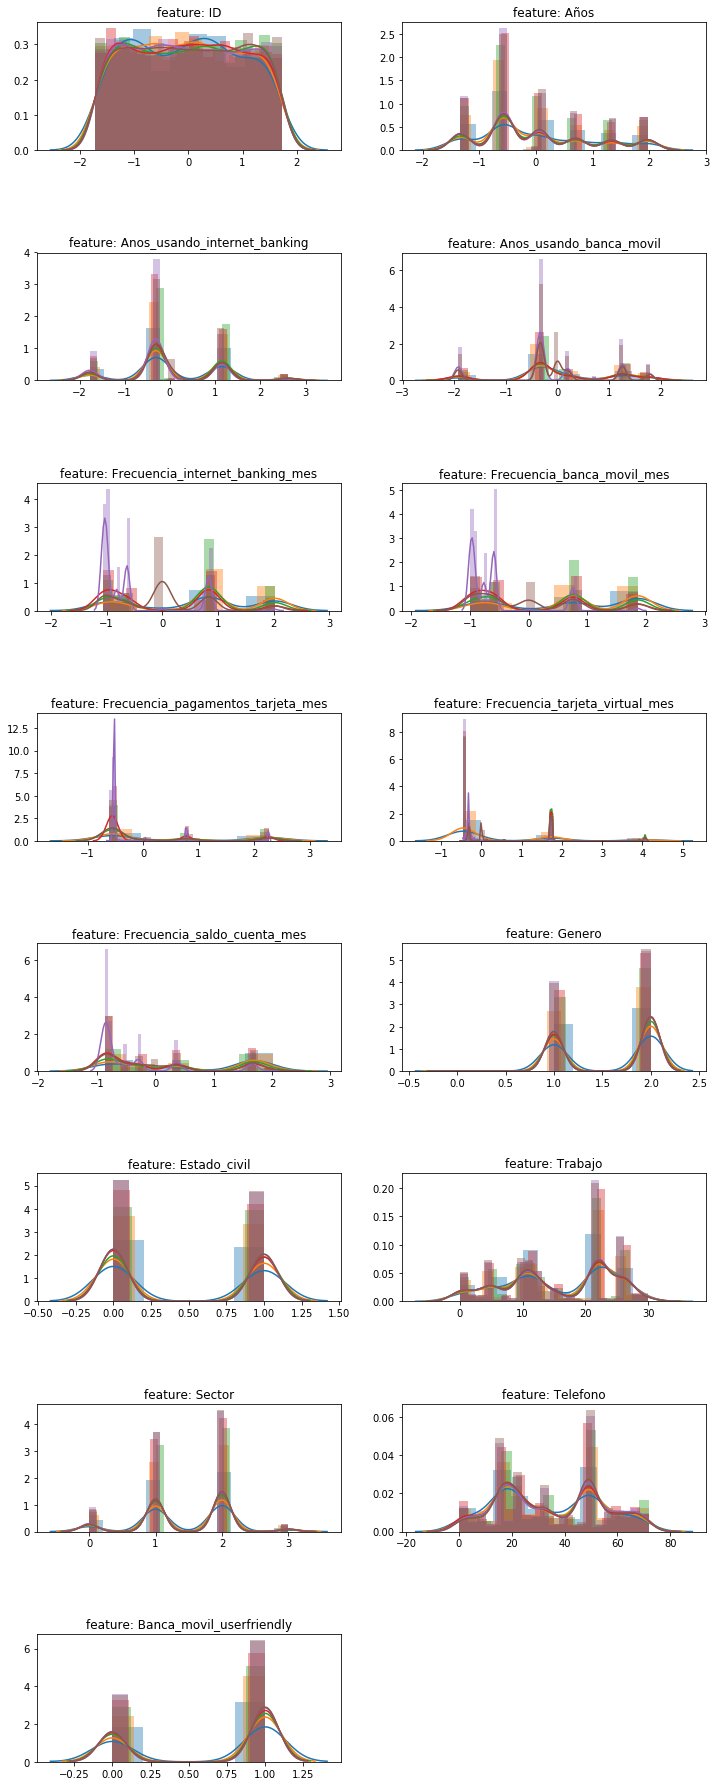

In [24]:
def graficar_caraterisitcas(df_norm,categorias_target,columna_target):   
    features = df_norm.drop(columna_target, axis=1)
    plt.figure(figsize=(12,32))
    gs = gridspec.GridSpec(8, 2)
    gs.update(hspace=0.8)

    for i, f in enumerate(features):
        ax = plt.subplot(gs[i])
        for col in categorias_target:
            sns.distplot(df_norm[f][df_norm[columna_target] == col])        
        ax.set_xlabel('')
        ax.set_title('feature: ' + str(f))
    plt.show()
graficar_caraterisitcas(df4,categorias_target,columna_target)

In [25]:
def plot_scatter_pca(finalDf, targets, col_target):    
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    ax.set_title('2 component PCA', fontsize = 20)    
    colors = ['c', 'g', 'b','y','r']
    for target, color in zip(targets,colors):
        indicesToKeep = finalDf[col_target] == target
        ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
                   , finalDf.loc[indicesToKeep, 'principal component 2']
                   
                   , s = 50)
    ax.legend(targets)
    ax.grid()

def graficar_modelo_PCA(df_temp,columna_target):
    columnas_modelo = [v for v in df_temp.columns if v not in [columna_target]]
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(df_temp[columnas_modelo])
    principalDf = pd.DataFrame(data = X_pca, index = df4.index
             , columns = ['principal component 1', 'principal component 2'])
    finalDf = pd.concat([principalDf, df_temp[columna_target]], axis = 1)
    plot_scatter_pca(finalDf,categorias_target, columna_target)

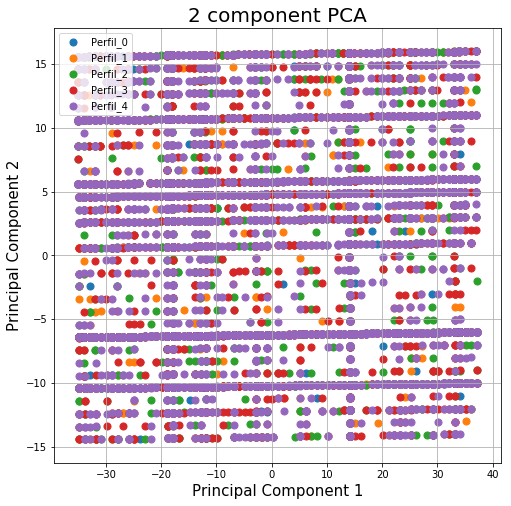

In [26]:
graficar_modelo_PCA(df4,columna_target)

(23999, 13)
Valores nulos del df_training_dataset despues de la transformación DropNA: 

TARGET                               0
Años                                 0
Anos_usando_internet_banking         0
Anos_usando_banca_movil              0
Frecuencia_internet_banking_mes      0
Frecuencia_banca_movil_mes           0
Frecuencia_pagamentos_tarjeta_mes    0
Frecuencia_tarjeta_virtual_mes       0
Frecuencia_saldo_cuenta_mes          0
Genero                               0
Estado_civil                         0
Sector                               0
Banca_movil_userfriendly             0
dtype: int64



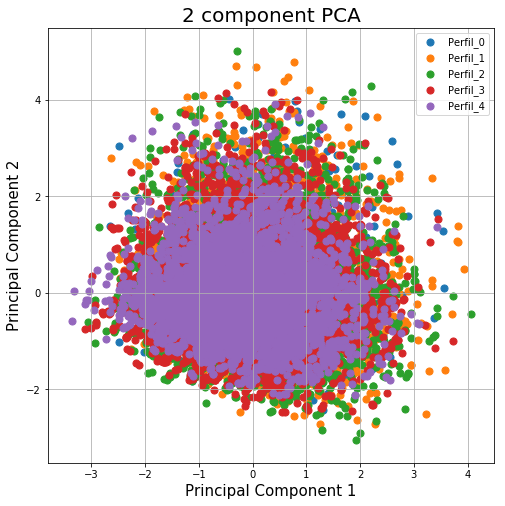

In [27]:
df5 = DropColumns(columns=['ID','Telefono','Trabajo']).fit_transform(df4)
validar_nulos(df5)
graficar_modelo_PCA(df5,columna_target)

In [28]:
carateristicas_encoder = ['Sector','Genero', 'Estado_civil', 'Banca_movil_userfriendly','Años']
df6 = DataOneHotEncoderTransform(columns=carateristicas_encoder).fit_transform(df5)
validar_nulos(df6)

(23999, 26)
Valores nulos del df_training_dataset despues de la transformación DropNA: 

TARGET                               0
Anos_usando_internet_banking         0
Anos_usando_banca_movil              0
Frecuencia_internet_banking_mes      0
Frecuencia_banca_movil_mes           0
Frecuencia_pagamentos_tarjeta_mes    0
Frecuencia_tarjeta_virtual_mes       0
Frecuencia_saldo_cuenta_mes          0
Sector_0                             0
Sector_1                             0
Sector_2                             0
Sector_3                             0
Genero_0                             0
Genero_1                             0
Genero_2                             0
Estado_civil_0                       0
Estado_civil_1                       0
Banca_movil_userfriendly_0           0
Banca_movil_userfriendly_1           0
Años_-1.3322079380248213             0
Años_-0.570632980226898              0
Años_0.0                             0
Años_0.0640128179380382              0
Años_0.6986586

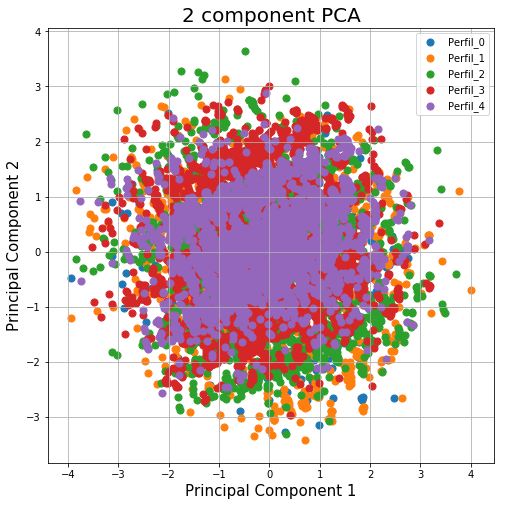

In [29]:
graficar_modelo_PCA(df6,columna_target)

In [30]:
import random
def agregar_datos_sinteticos(df_val):
    for targ in categorias_target:
        df_graduado = df_val[df_val[columna_target]==targ]
        for i in range (0,5500):
            columnas = df_graduado.columns.values    
            index = random.randint(1000000000, 90000000000)       
            df_temp = pd.DataFrame(data=[], index=[index],columns = columnas)
            for columna in columnas:       
                df_seleccionado = df_graduado.sample()
                df_temp.at[index , columna] = df_seleccionado[columna].values[0]                    
            df_val=pd.concat([df_val,df_temp])
    return df_val
#df7 = agregar_datos_sinteticos(df6)
#validar_nulos(df7)
df7=df6

In [31]:
columnas_modelo = [v for v in df7.columns if v not in ['TARGET']]
print(columnas_modelo)

features = df7[
    columnas_modelo
]

target = df7['TARGET']  ## No cambie esta variable

['Anos_usando_internet_banking', 'Anos_usando_banca_movil', 'Frecuencia_internet_banking_mes', 'Frecuencia_banca_movil_mes', 'Frecuencia_pagamentos_tarjeta_mes', 'Frecuencia_tarjeta_virtual_mes', 'Frecuencia_saldo_cuenta_mes', 'Sector_0', 'Sector_1', 'Sector_2', 'Sector_3', 'Genero_0', 'Genero_1', 'Genero_2', 'Estado_civil_0', 'Estado_civil_1', 'Banca_movil_userfriendly_0', 'Banca_movil_userfriendly_1', 'Años_-1.3322079380248213', 'Años_-0.570632980226898', 'Años_0.0', 'Años_0.0640128179380382', 'Años_0.6986586161029744', 'Años_1.3333044142679105', 'Años_1.9679502124328467']


In [32]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
rus = RandomOverSampler(sampling_strategy='auto')
X_rus, y_rus = rus.fit_sample(features, target)

In [33]:
from sklearn.decomposition import PCA
def obtener_modelo_PCA(df_temp,columna_target,dim):
    columnas_modelo = [v for v in df_temp.columns if v not in [columna_target]]
    pca = PCA(n_components=dim)
    X_pca = pca.fit_transform(df_temp[columnas_modelo])
    principalDf = pd.DataFrame(data = X_pca, index = df4.index)
    finalDf = pd.concat([principalDf, df_temp[columna_target]], axis = 1)
    return finalDf

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X_rus, y_rus, test_size=0.2, random_state=semilla_aleatoria)

In [35]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
semilla_aleatoria = 1234
dtc_model = RandomForestClassifier()
dtc_model.fit(X_train, y_train)

RandomForestClassifier()

In [36]:
y_pred = dtc_model.predict(X_test)
print(y_pred)

['Perfil_5' 'Perfil_1' 'Perfil_3' ... 'Perfil_5' 'Perfil_0' 'Perfil_3']


### Analizando la calidad del modelo a través de la matriz de confusión

In [37]:
import matplotlib.pyplot as plt
import numpy as np
import itertools


def plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None, normalize=True):
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy
    if cmap is None:
        cmap = plt.get_cmap('Blues')
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.2f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

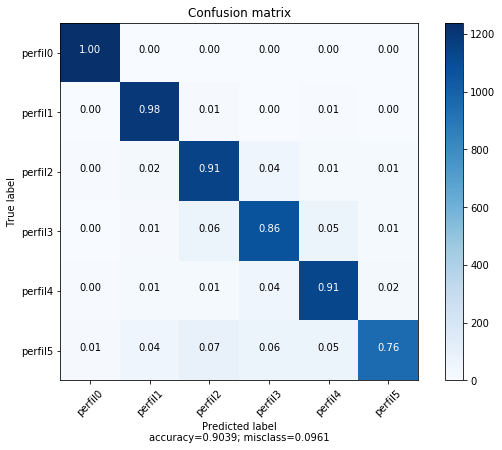

In [38]:
from sklearn.metrics import confusion_matrix
plot_confusion_matrix(confusion_matrix(y_test, y_pred), ['perfil0', 'perfil1', 'perfil2', 'perfil3', 'perfil4', 'perfil5'])

<hr>

## Scoring de los datos necesarios para entregar la solución

Como entrega de su solución, esperamos los resultados clasificados del seguiente dataset llamado "to_be_scored.csv":

### Download la "Hoja de evaluación"

In [39]:
!wget --no-check-certificate --content-disposition https://gitlab.com/JoaoPedroPP/datasets/-/raw/master/to_be_scored.csv
df_to_be_scored = pd.read_csv(r'to_be_scored.csv')
df_to_be_scored.tail()

--2020-09-18 06:05:39--  https://gitlab.com/JoaoPedroPP/datasets/-/raw/master/to_be_scored.csv
Resolving gitlab.com (gitlab.com)... 172.65.251.78, 2606:4700:90:0:f22e:fbec:5bed:a9b9
Connecting to gitlab.com (gitlab.com)|172.65.251.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/plain]
Saving to: ‘to_be_scored.csv.3’

    [ <=>                                   ] 87,631      --.-K/s   in 0.002s  

2020-09-18 06:05:39 (37.3 MB/s) - ‘to_be_scored.csv.3’ saved [87631]



,ID,Genero,Años,Estado_civil,Trabajo,Sector,Telefono,Anos_usando_internet_banking,Anos_usando_banca_movil,Banca_movil_userfriendly,Frecuencia_internet_banking_mes,Frecuencia_banca_movil_mes,Frecuencia_pagamentos_tarjeta_mes,Frecuencia_tarjeta_virtual_mes,Frecuencia_saldo_cuenta_mes
995,25,M,35.0,Casado,Desempleados,Sector privado,ASUS,5.0,3.0,No,7.0,50.0,1.0,0.0,31.0
996,179,M,40.0,Soltero,Profesor,Sector privado,Iphone,10.0,NaN,Si,0.0,1.0,0.0,15.0,1.0
997,222,M,30.0,Casado,Profesor,Institucion publica,LG G2,5.0,3.0,Si,31.0,31.0,0.0,0.0,NaN
998,238,F,35.0,Casado,Servidor publico,Desempleados,Iphone 5,15.0,4.0,No,0.0,4.0,1.0,0.0,31.0
999,152,M,35.0,Soltero,Profesor,Institucion publica,Iphone,0.0,NaN,Si,30.0,7.0,15.0,15.0,15.0


# ¡Atención!

El dataframe ``to_be_scored`` en su "hoja de evaluación". Note que la columna "categoria" no existe en esta muetra, por lo que no puede ser utilizada para entrenar modelos supervisados

In [40]:
df_to_be_scored.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
ID                                   1000 non-null int64
Genero                               963 non-null object
Años                                 980 non-null float64
Estado_civil                         976 non-null object
Trabajo                              864 non-null object
Sector                               983 non-null object
Telefono                             927 non-null object
Anos_usando_internet_banking         977 non-null float64
Anos_usando_banca_movil              945 non-null float64
Banca_movil_userfriendly             1000 non-null object
Frecuencia_internet_banking_mes      911 non-null float64
Frecuencia_banca_movil_mes           940 non-null float64
Frecuencia_pagamentos_tarjeta_mes    991 non-null float64
Frecuencia_tarjeta_virtual_mes       977 non-null float64
Frecuencia_saldo_cuenta_mes          973 non-null float64
dtypes: float64(8), int64(1), 

<hr>

# ¡Atención!

# Para poder aplicar su modelo y clasificar la hoja de evaluación, usted debe aplicar primero todas las transformaciones de columna que usted aplico en el dataset de entrenamiento.

# No remueva o adicione filas en la hoja de evaluación. 

# No altere el orden de las filas en la hoja de evaluación. 

# Al final, las 1000 entradas deben estar clasificadas, con los valores calculados en una columna llamada "target"

<hr>

En la celda de abajo, repetimos rapidamente los mismos pasos de pré-procesamiento usados en el ejemplo dado con árbol de decisión

In [41]:
df2 = DataFrameImputer().fit_transform(df_to_be_scored)
columnas_no_nu = [v for v in columnas_no_numericas if v not in ['TARGET']]
df3 = DataScaleImputer(columns=columnas_no_nu).fit_transform(df2)
df4 = DataLabelEncoderTransform(columns=columnas_encoder).fit_transform(df3)
df5 = DropColumns(columns=['ID','Telefono','Trabajo']).fit_transform(df4)
df6 = DataOneHotEncoderTransform(columns=carateristicas_encoder).fit_transform(df5)
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
Anos_usando_internet_banking         1000 non-null float64
Anos_usando_banca_movil              1000 non-null float64
Frecuencia_internet_banking_mes      1000 non-null float64
Frecuencia_banca_movil_mes           1000 non-null float64
Frecuencia_pagamentos_tarjeta_mes    1000 non-null float64
Frecuencia_tarjeta_virtual_mes       1000 non-null float64
Frecuencia_saldo_cuenta_mes          1000 non-null float64
Sector_0                             1000 non-null uint8
Sector_1                             1000 non-null uint8
Sector_2                             1000 non-null uint8
Sector_3                             1000 non-null uint8
Genero_0                             1000 non-null uint8
Genero_1                             1000 non-null uint8
Genero_2                             1000 non-null uint8
Estado_civil_0                       1000 non-null uint8
Estado_civil_1           

<hr>

Puede verificar abajo que las columnas de la hoja de evaluación son identicas a las usadas para entrenar el modelo:

# Atención

Para todas las columnas que no existiren en "df_to_be_scored", usted puede usar la tecnica de abajo para adicionarla:

In [42]:
df_to_be_scored_4=df6

In [43]:
y_pred = dtc_model.predict(df_to_be_scored_4)
df_to_be_scored_4['TARGET'] = y_pred
df_to_be_scored_4.tail()

,Anos_usando_internet_banking,Anos_usando_banca_movil,Frecuencia_internet_banking_mes,Frecuencia_banca_movil_mes,Frecuencia_pagamentos_tarjeta_mes,Frecuencia_tarjeta_virtual_mes,Frecuencia_saldo_cuenta_mes,Sector_0,Sector_1,Sector_2,...,Banca_movil_userfriendly_0,Banca_movil_userfriendly_1,Años_-1.3413585612737353,Años_-0.5684836626662326,Años_0.0,Años_0.07557875284001961,Años_0.7196411683462719,Años_1.3637035838525242,Años_2.0077659993587766,TARGET
995,-0.339598,-0.333820,-0.567615,1.806263,-0.497201,-0.452422,1.692156e+00,0,0,1,...,1,0,0,0,0,1,0,0,0,Perfil_2
996,1.113060,0.000000,-1.001733,-0.946946,-0.594348,1.812778,-7.887095e-01,0,0,1,...,0,1,0,0,0,0,1,0,0,Perfil_5
997,-0.339598,-0.333820,0.920791,0.738692,-0.594348,-0.452422,1.468967e-16,0,1,0,...,0,1,0,1,0,0,0,0,0,Perfil_5
998,2.565718,0.188464,-1.001733,-0.778383,-0.497201,-0.452422,1.692156e+00,1,0,0,...,1,0,0,0,0,1,0,0,0,Perfil_4
999,-1.792256,0.000000,0.858774,-0.609819,0.862848,1.812778,3.690277e-01,0,1,0,...,0,1,0,0,0,1,0,0,0,Perfil_2


### Guardando la hoja de evaluacion como un archivo .csv para ser enviado
**SI YA TIENE UN DATA ASSET CON EL NOMBRE results.csv EN ESTE PROYECTO O EN OTRO PROYECTO DE WATSON STUDIO DEBE BORRAR EL ARCHIVO ANTES DE CORRER LA SIGUIENTE CELDA O TENDRA EL ERROR: _RuntimeError: File 'results.csv' already exists in storage._**

In [44]:
project.save_data(file_name="results.csv", data=df_to_be_scored_4.to_csv(index=False))

{'file_name': 'results.csv',
 'message': 'File saved to project storage.',
 'bucket_name': 'btcbancopel-donotdelete-pr-30piq4gearwdf5',
 'asset_id': 'be236719-320d-41e0-9a35-572138f8fea4'}

# ATENCIÓN

# La ejecución de la celda anterior creará un nuevo "data asset" en su proyecto de Watson Studio. Deberá descargar este archivo junto con este cuaderno y crear un archivo zip con results.csv y notebook.ipynb para enviarlo. (los archivos deben tener este nombre)

<hr>

## ¡Felicitaciones!
Si ya está satisfecho con su solución, vaya a la página siguiente y envíe los archivos necesarios para su envío.

# https://bancoppel.maratona.dev
